<a href="https://colab.research.google.com/github/sahushubham3107/Customer_Segmentation/blob/main/Project4_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation using K-Means Clustering With Python**

We will go throught the following work-flow
- Customer Data
- Data Pre-processing
- Data Analysis
- To find the optimum number of clusters
- K-Means Clustering
- Visualizing the clusters through plots


In [1]:
# First we will import the dependencies i.e. Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans    # importing the K-Means clustering algorithm
import seaborn as sns

Data Collection and Analysis

In [2]:
# loading the data from csv file to a pandas dataframe 
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
# Lets check first five data of the whole dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Now lets find the number of rows and columns contained in this dataset

In [4]:
customer_data.shape

(200, 5)

For better understanding of the dataset let find more descriptive data using the .info function

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


- As we can see from the information above that there is no null data in the dataset

In [6]:
# Rechecking the missing values for cross checking
customer_data.isnull().sum()  

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Now we will rectify our data that which data we really needed and which don't
- For ex. We don't need Customer ID for making the clustering here



Choosing the Annual Income Column and Spending Score Column 

In [7]:
x = customer_data.iloc[:,[3,4]].values   # storing 4th and 5th column data  in variable x

In [8]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

**Now we are choosing correct number of clusters**

We will use WCSS --> Within Clusters Sum of Squares



In [9]:
# Finding WCSS value for different no. of clusters 
wcss = []   # creating empty array list
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

Now we will try to plot elbow graph for find which cluster has minimum value

<function matplotlib.pyplot.show(*args, **kw)>

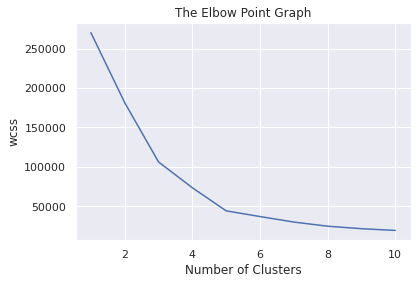

In [10]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel('wcss')
plt.show

We will choose that point upto which there is very significant drop like from above we can see that after point 5 there is no such significant drop so we will select our optimum numbers of clusters to be 5

Training the K-Means Clustering Model
- Here K represents no. of clusters 

In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=0)
# Now we need to return label for each data point based on  their clustery
y= kmeans.fit_predict(x)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


The above array shows the no. of cluster from which they belong

Here we have five clusters and their numbering starts from 0 upto 4

**Now we will visualize all the clusters from the given dataset**

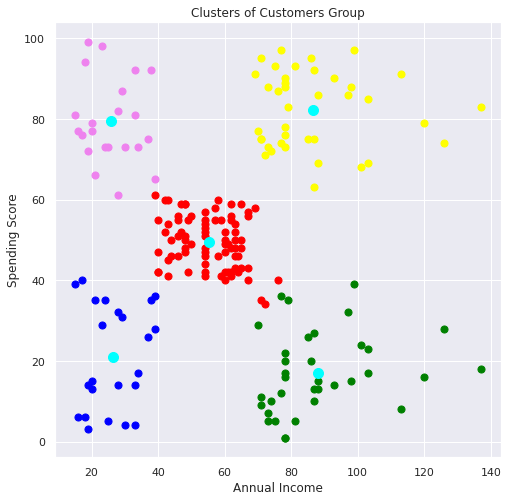

In [12]:
# plotting all the clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50, c='green', label='Cluster =1')  # here first x[y=0,0] signifies x-coordinate in which we are picking value from column 1 of cluster no. zero or first cluster
plt.scatter(x[y==1,0],x[y==1,1],s=50, c='red', label='Cluster =2')
plt.scatter(x[y==2,0],x[y==2,1],s=50, c='yellow', label='Cluster =3')
plt.scatter(x[y==3,0],x[y==3,1],s=50, c='violet', label='Cluster =4')
plt.scatter(x[y==4,0],x[y==4,1],s=50, c='blue', label='Cluster =5')

# # Plotting the centroids now
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='centroids')  # this will show the cluster's CG in the plot in the cyan color
plt.title('Clusters of Customers Group')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

What insighs can we get from this cluster
- Violet cluster's people has very less annual income but more spending score
- Blue Cluster's people has less annual income as well as less spending score
- Green Cluster's people has high annual income but they are less spending in nature
- Yellow Cluster's people has very much annual income as well as their tendency to spend is also more
- Red cluster's people are stable in nature means they have neither very high income neither their spendings are more.

-- For less spending people one can deploy offers and gifts and credit cards so that their interest towards shopping may increase

This clustering can also work in recommendation system as well so that we can find their which type of content audience really want so that we can recommend him more precisely about that content.